In [45]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [46]:
data = pd.read_csv('./dataset/HR_comma_sep.csv')
data['salary'] = data['salary'].map({'low':0, 'medium':1, 'high':2})
data['sales'] = data['sales'].map({'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5, 'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9})
data['left'] = data['left'].map({0: 0, 1: 1})

# 将数据集分成训练集和测试集
train_data, test_data, train_label, test_label = train_test_split(data.drop(['left'], axis=1).values, data['left'].values, test_size=0.2)

# 将训练集和测试集转换为PyTorch张量
train_data = torch.tensor(train_data).float()
test_data = torch.tensor(test_data).float()
train_label = torch.tensor(train_label).long()
test_label = torch.tensor(test_label).long()

In [47]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

net = Net()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)




In [48]:
# 训练模型
losses = []
epoch = 7500
for i in range(epoch):
    out = net(train_data)
    loss = loss_func(out, train_label.float().unsqueeze(1))
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(i+1, epoch, loss.item()))



Epoch[100/7500], loss: 0.181280
Epoch[200/7500], loss: 0.181279
Epoch[300/7500], loss: 0.181279
Epoch[400/7500], loss: 0.181279
Epoch[500/7500], loss: 0.181279
Epoch[600/7500], loss: 0.181279
Epoch[700/7500], loss: 0.181279
Epoch[800/7500], loss: 0.181279
Epoch[900/7500], loss: 0.181279
Epoch[1000/7500], loss: 0.181279
Epoch[1100/7500], loss: 0.181279
Epoch[1200/7500], loss: 0.181279
Epoch[1300/7500], loss: 0.181279
Epoch[1400/7500], loss: 0.181279
Epoch[1500/7500], loss: 0.181279
Epoch[1600/7500], loss: 0.181279
Epoch[1700/7500], loss: 0.181279
Epoch[1800/7500], loss: 0.181279
Epoch[1900/7500], loss: 0.181279
Epoch[2000/7500], loss: 0.181279
Epoch[2100/7500], loss: 0.181279
Epoch[2200/7500], loss: 0.181279
Epoch[2300/7500], loss: 0.181279
Epoch[2400/7500], loss: 0.181279
Epoch[2500/7500], loss: 0.181279
Epoch[2600/7500], loss: 0.181279
Epoch[2700/7500], loss: 0.181279
Epoch[2800/7500], loss: 0.181279
Epoch[2900/7500], loss: 0.181279
Epoch[3000/7500], loss: 0.181279
Epoch[3100/7500], l

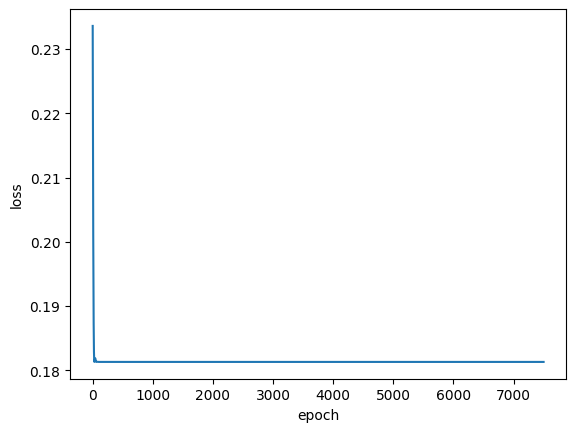

In [49]:
# 保存模型
torch.save(net.state_dict(), './model/HR_comma.pth')

# 画出损失函数曲线
plt.plot(np.arange(epoch), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
# 导入训练好的模型模型预测left的值，并与原始值进行比较，计算准确率
net = Net()
net.load_state_dict(torch.load('./model/HR_comma.pth'))
outputs = net(test_data)
_, predicted = torch.max(outputs, 1)
print('Accuracy of the network on the test data: {} %'.format((test_label == predicted.squeeze()).sum().item() / test_label.size(0) * 100))


Accuracy of the network on the test data: 76.1 %


In [55]:
net = Net()
net.load_state_dict(torch.load('./model/HR_comma.pth'))

# 准备新的数据
new_data = torch.tensor([0.68,0.85,3,243,4,0,0,3,1]) # 假设这是一个新的向量

# 进行预测
net.eval()
with torch.no_grad():
    output = net(new_data)
    _, predicted = torch.max(output, 0)

# 解释预测结果
if predicted == 0:
    print('The employee is likely to stay in the company.')
else:
    print('The employee is likely to leave the company.')

The employee is likely to stay in the company.
